# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [5]:
type(a)

numpy.ndarray

In [6]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [7]:
A[0]

array([3, 1, 2])

In [8]:
C[2, 0]

4

In [9]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [10]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [11]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [12]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [13]:
A / A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [14]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [15]:
A + B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [16]:
A * B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### Dot product

In [17]:
A.shape

(2, 3)

In [18]:
B.shape

(3, 2)

In [19]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [20]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [21]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [22]:
C.shape

(6, 2)

In [23]:
A.shape

(2, 3)

In [24]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [25]:
A.dot(C)

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)

## Gradient descent

![](../data/banknotes.png)

In [26]:
df = pd.read_csv('../data/banknotes.csv')

In [27]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [29]:
import seaborn as sns

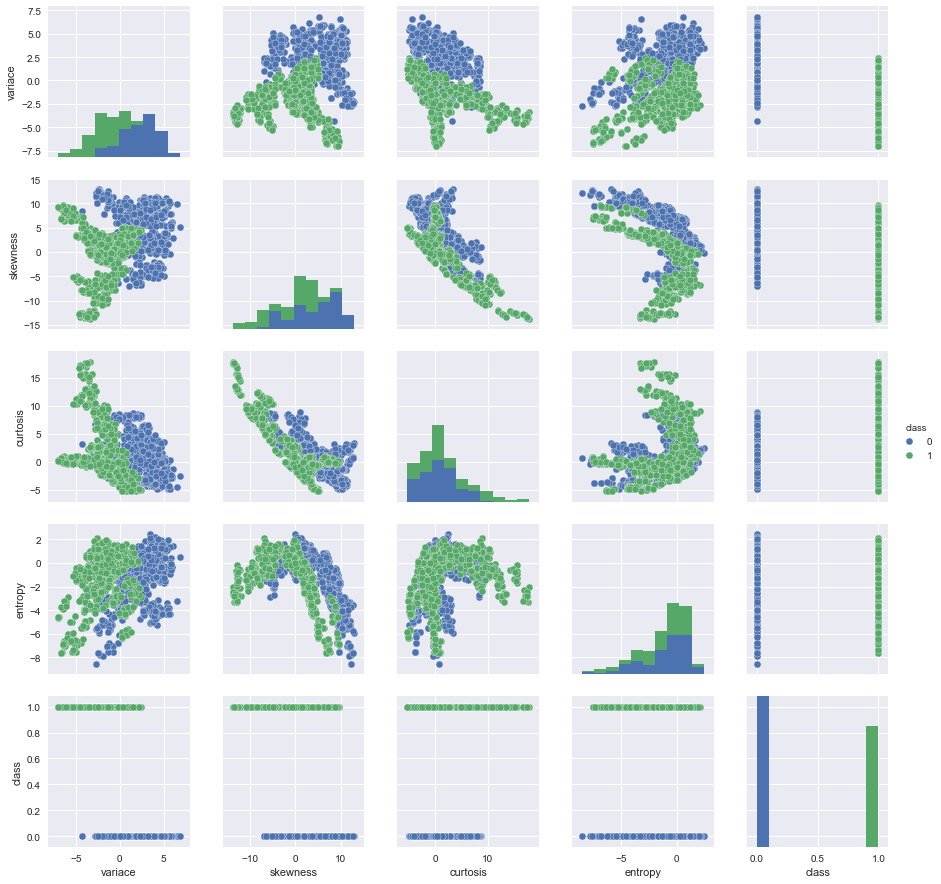

In [30]:
sns.pairplot(df, hue="class")

#### Baseline model

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [32]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [33]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.98689956,  0.99781182,  0.99343545])

### Logistic Regression Model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [35]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [51]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.6959 - acc: 0.6052     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.6094 - acc: 0.6365     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.5425 - acc: 0.7094     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.4915 - acc: 0.8052     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.4523 - acc: 0.8677     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.4220 - acc: 0.8969     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.3981 - acc: 0.9125     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.3789 - acc: 0.9177     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.3631 - acc: 0.9198     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [52]:
historydf = pd.DataFrame(history.history, index=history.epoch)

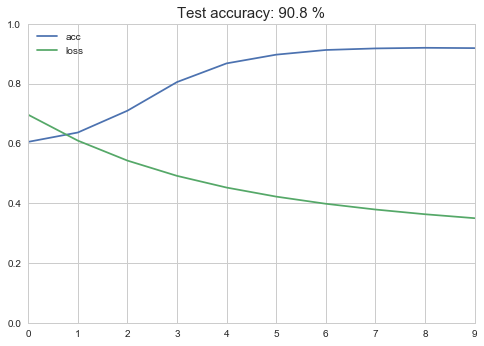

In [53]:
sns.set_style("whitegrid")
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [54]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [55]:
historydf = pd.concat(dflist, axis=1)

In [56]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.119792,1.172725,0.842708,0.485400,0.801042,0.486993,0.865625,0.325708
1,0.229167,0.972800,0.941667,0.327060,0.926042,0.281315,0.966667,0.130104
2,0.375000,0.833059,0.942708,0.270946,0.947917,0.222734,0.970833,0.096112
3,0.522917,0.734409,0.950000,0.236681,0.956250,0.187373,0.977083,0.080638
4,0.626042,0.662367,0.953125,0.212387,0.962500,0.163388,0.979167,0.071679
5,0.681250,0.607737,0.956250,0.193820,0.966667,0.146159,0.980208,0.065500
6,0.727083,0.564757,0.960417,0.178966,0.968750,0.133181,0.980208,0.061204
7,0.757292,0.529871,0.962500,0.166836,0.968750,0.123100,0.980208,0.057641
8,0.782292,0.500733,0.965625,0.156723,0.969792,0.114871,0.981250,0.055015
9,0.797917,0.475832,0.967708,0.148146,0.970833,0.108138,0.981250,0.052653


In [57]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [58]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.119792  1.172725  0.842708  0.485400  0.801042  0.486993   
1              0.229167  0.972800  0.941667  0.327060  0.926042  0.281315   
2              0.375000  0.833059  0.942708  0.270946  0.947917  0.222734   
3              0.522917  0.734409  0.950000  0.236681  0.956250  0.187373   
4              0.626042  0.662367  0.953125  0.212387  0.962500  0.163388   
5              0.681250  0.607737  0.956250  0.193820  0.966667  0.146159   
6              0.727083  0.564757  0.960417  0.178966  0.968750  0.133181   
7              0.757292  0.529871  0.962500  0.166836  0.968750  0.123100   
8              0.782292  0.500733  0.965625  0.156723  0.969792  0.114871   
9              0.797917  0.475832  0.967708  0.148146  0.970833  0.108138   

learning_rate      0.50            
metric              acc      loss  
0              0.865625  0.325708  
1              0.966667  0.130104  
2              0.970833  0.096112  
3              0.977083  0.080638  
4              0.979167  0.071679  
5              0.980208  0.065500  
6              0.980208  0.061204  
7              0.980208  0.057641  
8              0.981250  0.055015  
9              0.981250  0.052653

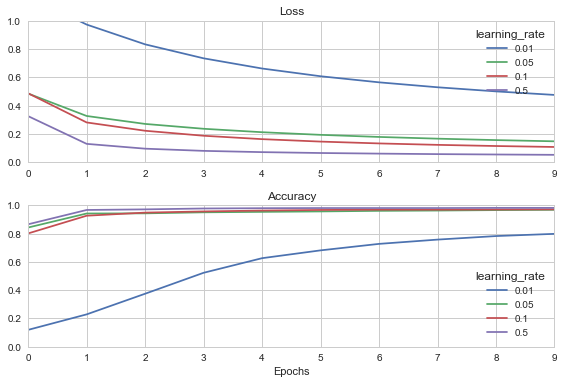

In [59]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [60]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [61]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [62]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.627083  0.664823  0.475000  1.242213  0.745833  0.526702   
1           0.681250  0.598134  0.488542  1.072555  0.753125  0.519169   
2           0.720833  0.546494  0.514583  0.922993  0.760417  0.511998   
3           0.756250  0.506211  0.540625  0.796055  0.766667  0.505149   
4           0.785417  0.474185  0.579167  0.692599  0.770833  0.498643   
5           0.804167  0.448051  0.625000  0.611262  0.777083  0.492381   
6           0.819792  0.426150  0.705208  0.548699  0.781250  0.486373   
7           0.830208  0.407493  0.802083  0.500956  0.786458  0.480599   
8           0.841667  0.391151  0.867708  0.464086  0.792708  0.475037   
9           0.852083  0.376647  0.886458  0.435226  0.795833  0.469693   

batch_size       128            
metric           acc      loss  
0           0.498958  0.749589  
1           0.503125  0.737452  
2           0.514583  0.726093  
3           0.526042  0.714973  
4           0.539583  0.704578  
5           0.548958  0.694726  
6           0.562500  0.685130  
7           0.584375  0.676072  
8           0.601042  0.667339  
9           0.611458  0.658924

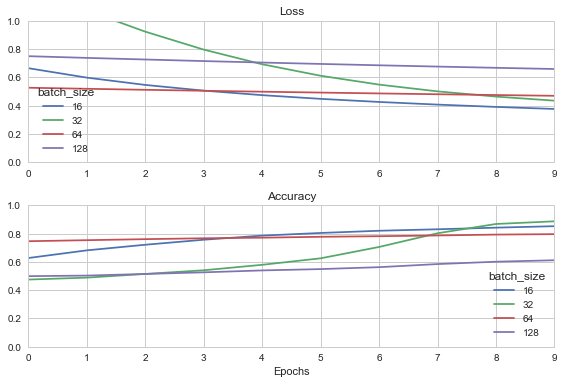

In [63]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [64]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
# RMSprop and Adam converge quickly in the example below.

In [65]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [66]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

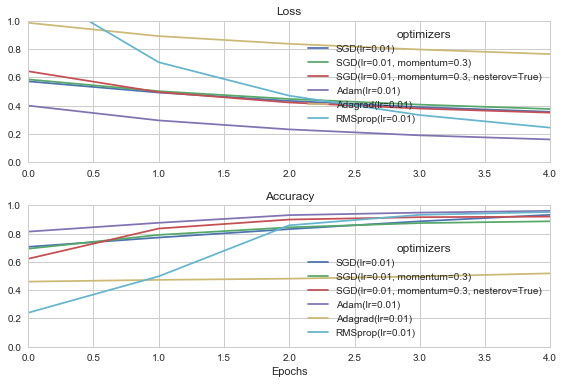

In [67]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [71]:
# changing initializations can help you get out of a local minima
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [72]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

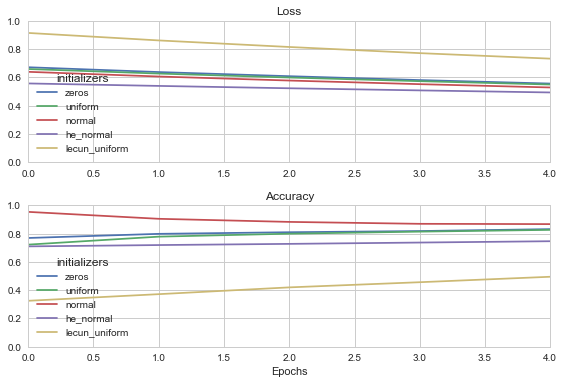

In [73]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [106]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=10,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/10
672/672 [==============================] - 0s - loss: 0.4951 - acc: 0.8482 - val_loss: 0.4047 - val_acc: 0.9306
Epoch 2/10
672/672 [==============================] - 0s - loss: 0.3330 - acc: 0.9301 - val_loss: 0.2716 - val_acc: 0.9444
Epoch 3/10
672/672 [==============================] - 0s - loss: 0.2259 - acc: 0.9509 - val_loss: 0.1841 - val_acc: 0.9583
Epoch 4/10
672/672 [==============================] - 0s - loss: 0.1603 - acc: 0.9583 - val_loss: 0.1309 - val_acc: 0.9722
Epoch 5/10
672/672 [==============================] - 0s - loss: 0.1207 - acc: 0.9658 - val_loss: 0.0983 - val_acc: 0.9757
Epoch 6/10
672/672 [==============================] - 0s - loss: 0.0950 - acc: 0.9688 - val_loss: 0.0761 - val_acc: 0.9757
Epoch 7/10
672/672 [==============================] - 0s - loss: 0.0769 - acc: 0.9702 - val_loss: 0.0613 - val_acc: 0.9826
Epoch 8/10
672/672 [==============================] - 0s - loss: 0.0602 - acc: 0.9747 - val_l

In [107]:
result

[0.040290297144680347, 0.9854368932038835]

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.layers

In [110]:
inp = model.layers[0].input
out = model.layers[0].output

In [111]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [112]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [113]:
features_function = K.function([inp], [out])

In [114]:
features_function

In [115]:
features_function([X_test])[0].shape

(412, 2)

In [116]:
features = features_function([X_test])[0]

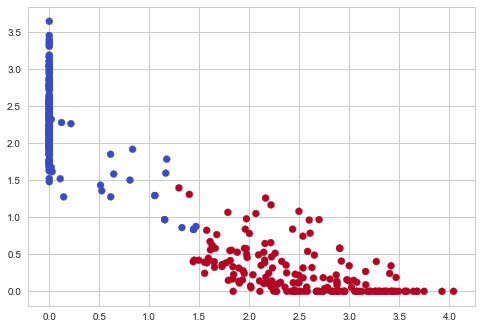

In [117]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [122]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

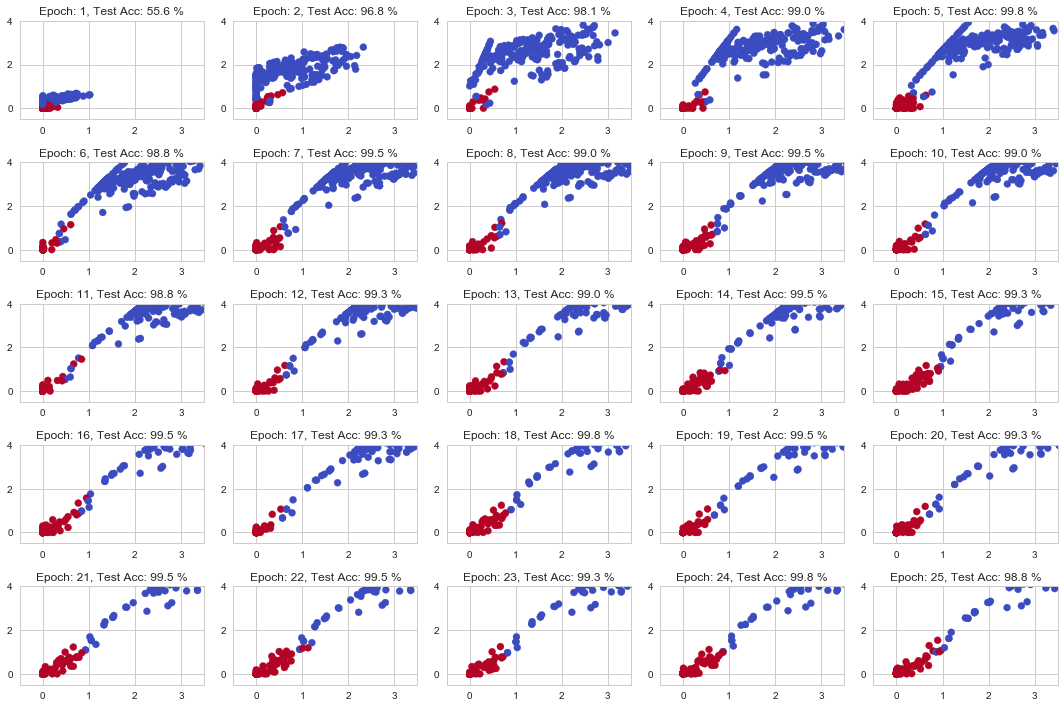

In [123]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [124]:
wine = pd.read_csv("../data/wines.csv")

In [138]:
wine.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [133]:
target = np.array(pd.get_dummies(wine.Class.values))

In [136]:
target[0:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

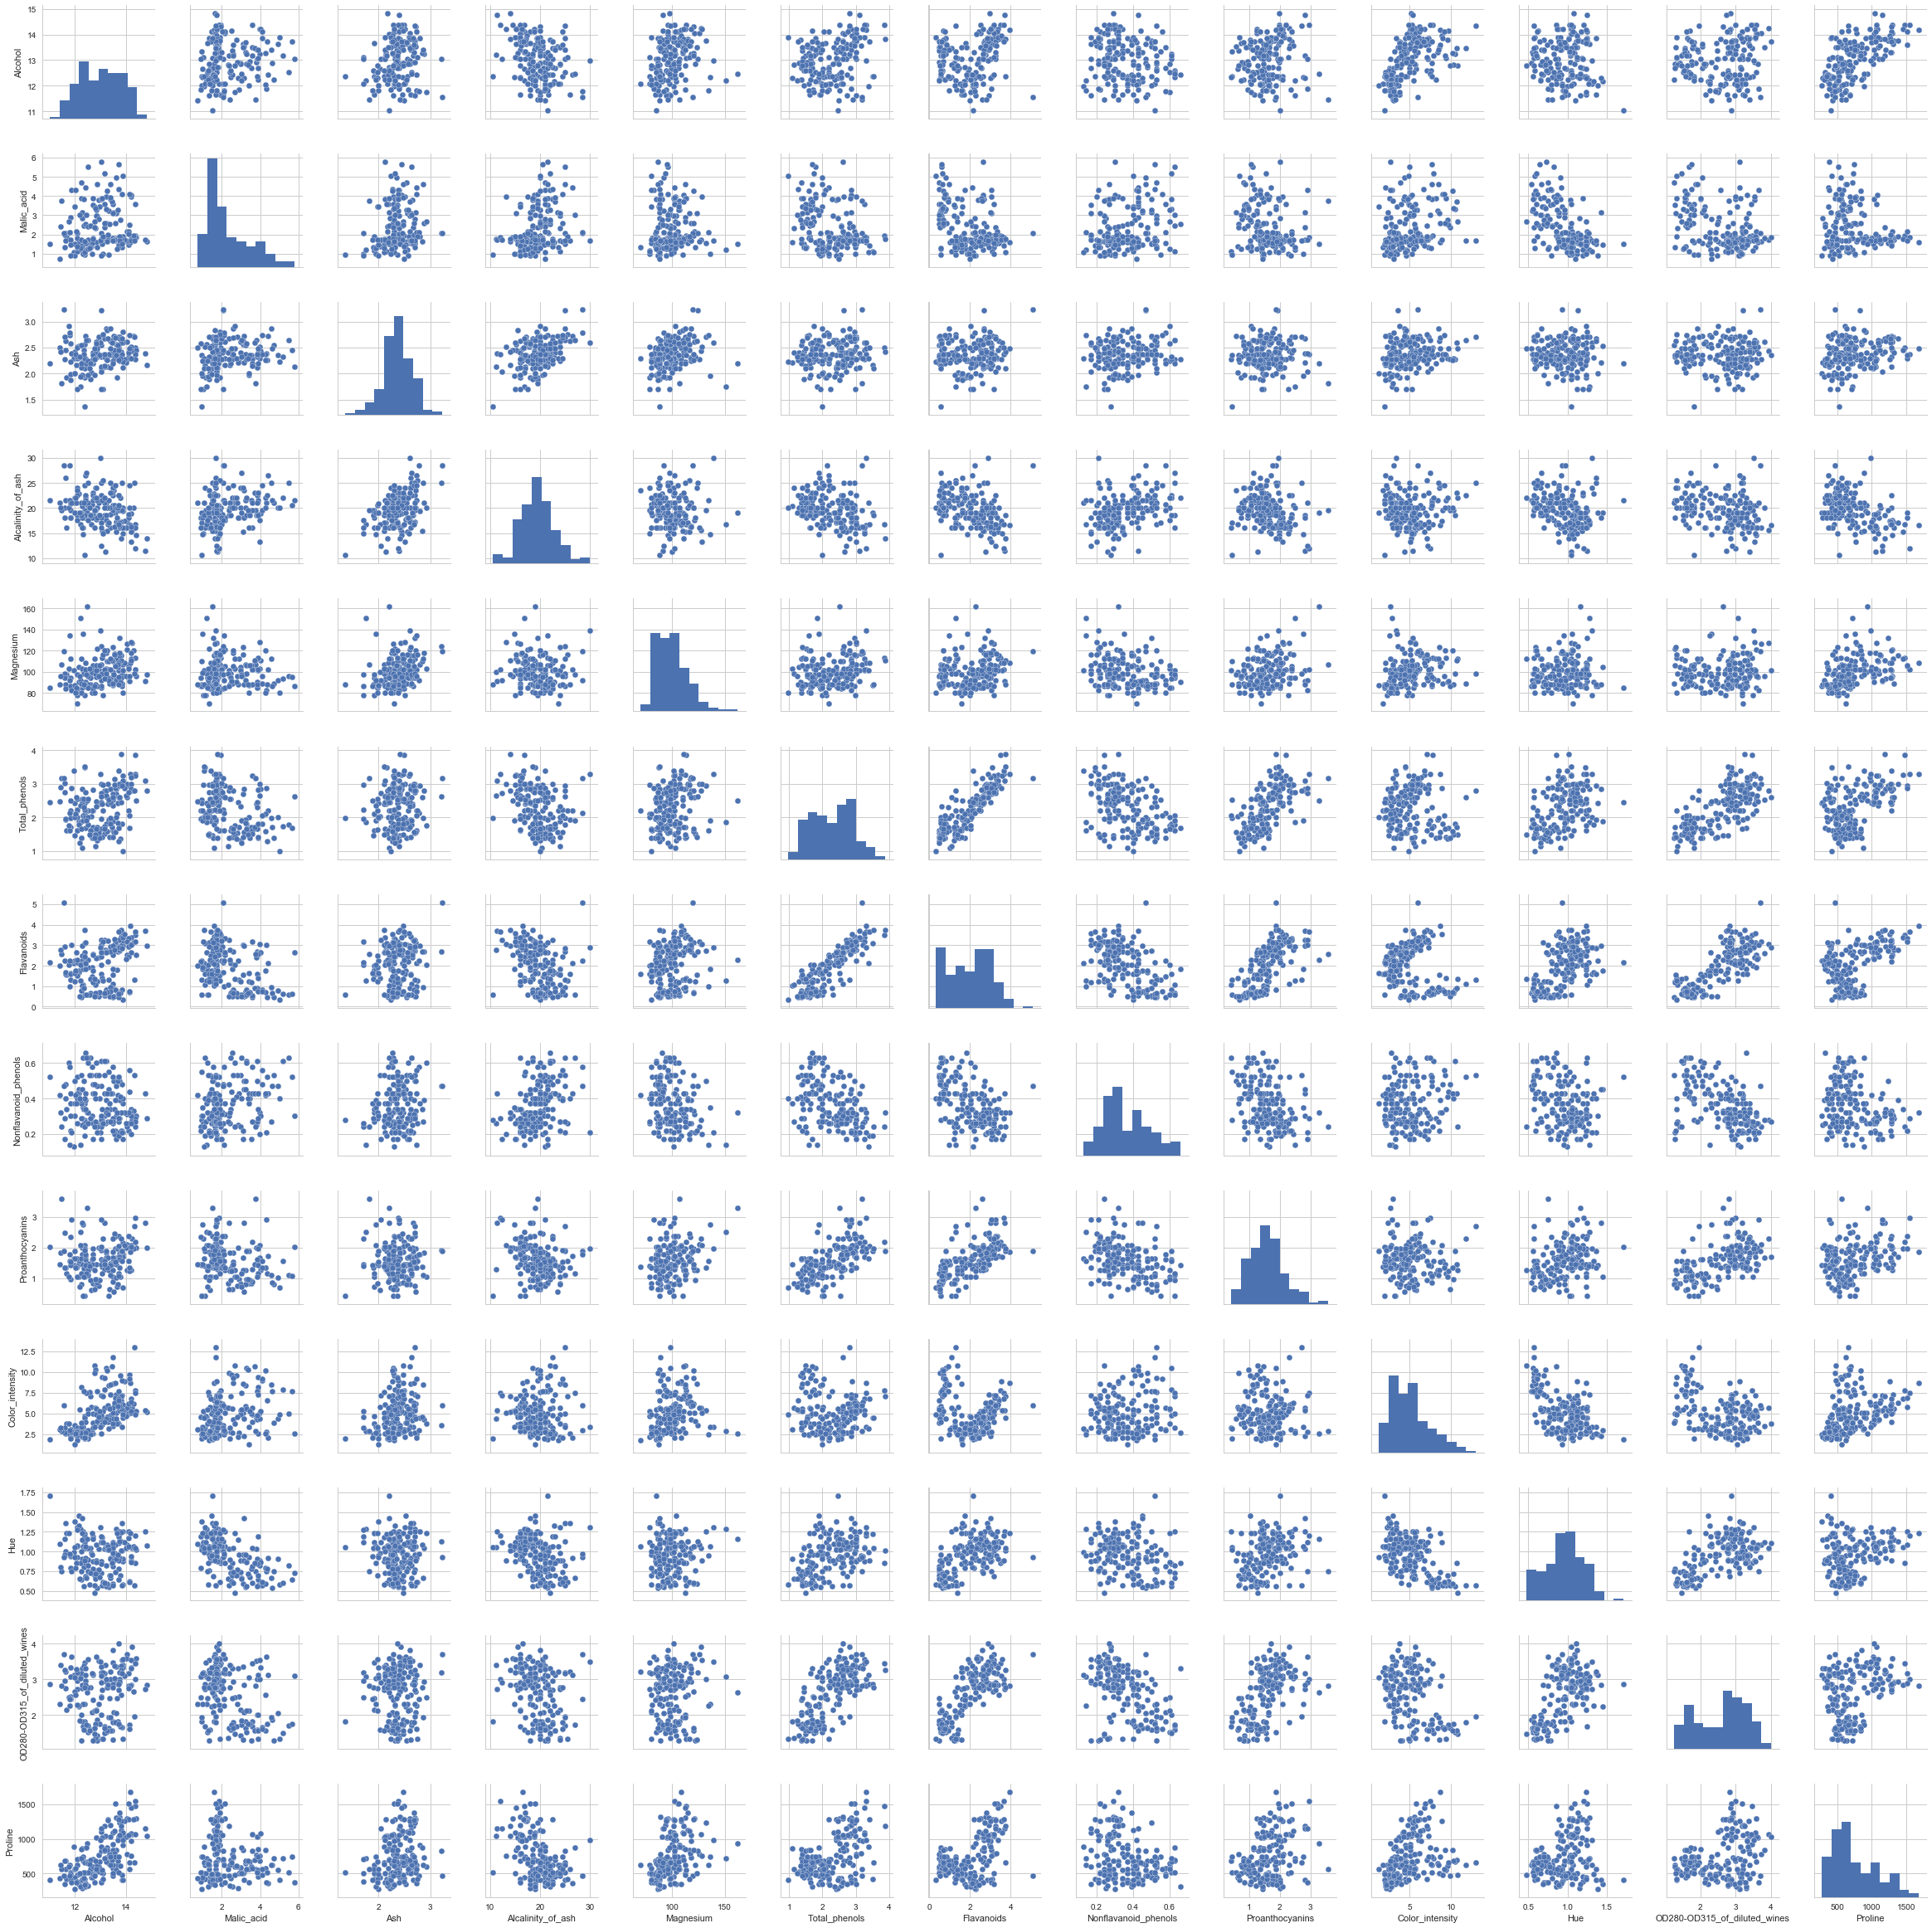

In [141]:
sns.pairplot(wine.iloc[:, 1:])

In [159]:
from sklearn.preprocessing import MinMaxScaler


mms = MinMaxScaler()
X = mms.fit_transform(wine.drop('Class', axis=1))
y = target

In [170]:
wine.drop('Class', axis=1).columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280-OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [171]:
pd.DataFrame(X, columns=wine.drop('Class', axis=1).columns).describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
X.shape

(178, 13)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=46)

In [203]:
K.clear_session()

In [204]:
# build deep model
model = Sequential()
model.add(Dense(6, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [209]:
h = model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=0)
test_accuracy = model.evaluate(X_test, y_test)[1]

32/36 [=========================>....] - ETA: 0s

In [210]:
test_accuracy

0.97222222222222221

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [222]:
# build deep model
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [223]:

h = model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=0)
test_accuracy = model.evaluate(X_test, y_test)[1]
test_accuracy

32/36 [=========================>....] - ETA: 0s

0.80555555555555558

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard